<a href="https://colab.research.google.com/github/SanjayS2348553/AiML/blob/main/2348553_lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing and reading the dataset
df = pd.read_csv('/content/Groceries_dataset (1).csv')
df

In [ ]:
df['q'] = 1
dfi = df.groupby(['Member_number','itemDescription'])['q'].sum().unstack().applymap(lambda x: 1 if x >= 1 else 0).astype('bool')

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

# create apriori algorithm
def AP(df, min_support, min_thresh, metric):
    ap = apriori(df, min_support = min_support, use_colnames=True)
    #rules = association_rules(ap, metric=  metric, min_threshold = min_thresh)
    pass

# create fp-growth algorithm
def FP(df, min_support, min_thres, metric):
    fp = fpgrowth(df, min_support = min_support, use_colnames=True)
    #rules = association_rules(fp, metric= metric, min_threshold = min_thresh)
    pass



In [ ]:
# create threads
import threading
import os
import time

t1 = threading.Thread(target = AP(dfi, 0.5, 0.8, 'confidence'), name = 'Apriori Thread')
t2 = threading.Thread(target = FP(dfi, 0.5, 0.8, 'confidence'), name = 'FP-growth Thread')

# timer

record = {'AP':0,
        'FP':0}

start = time.time()
t1.start()
t1.join()
end  = time.time() - start
record['AP'] = end

start = time.time()
t2.start()
t2.join()
end  = time.time() - start
record['FP'] = end






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

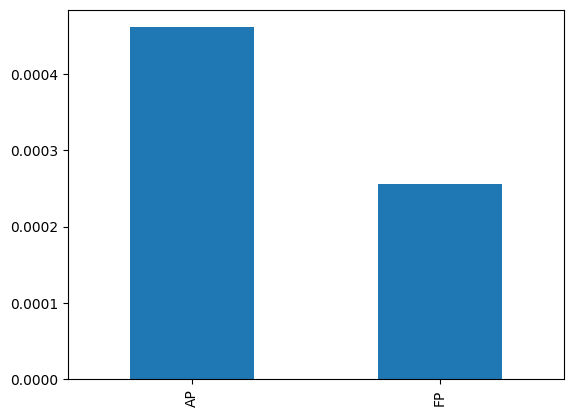

In [ ]:
pd.Series(record).plot(kind='bar')

In [ ]:
dfi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
def measure_execution_time(algo):
    start_time = time.time()
    func()
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
